In [3]:
import os 
import json 
import matplotlib.pyplot as plt 

LEFT_ROOT_DIR = "../../output/20240829/val_human_left"
RIGHT_ROOT_DIR = "../../output/20240829/val_human_right"
GUIDANCE_SCALES = ['3.0']
LEARNING_RATES = ['']
CHECKPOINTS = [0,10,20,30,40,50,60,70,80,90]

In [5]:
# read left accuracy 
left_accuracy = {}
for scale in GUIDANCE_SCALES:
    left_accuracy[scale] = {}
    for lr in LEARNING_RATES:
        left_accuracy[scale][lr] = []
        for checkpoint in CHECKPOINTS:
            checkpoint_dir = os.path.join(LEFT_ROOT_DIR, f"{scale}", "no_controlnet", f"{lr}", f"chk{checkpoint}", "lightning_logs", "version_0")
            with open(os.path.join(checkpoint_dir, "counting.json"), "r") as f:
                accuracy = json.load(f)
                left_accuracy[scale][lr].append(accuracy['left'])

FileNotFoundError: [Errno 2] No such file or directory: '../../output/20240829/val_human_left/3.0/new_light_block/chk0/lightning_logs/version_0/counting.json'

In [3]:
left_accuracy

{'1.0': {'5e-4': [143], '1e-4': [175], '5e-5': [126], '1e-5': [144]},
 '3.0': {'5e-4': [20], '1e-4': [85], '5e-5': [46], '1e-5': [43]},
 '5.0': {'5e-4': [19], '1e-4': [72], '5e-5': [44], '1e-5': [6]},
 '7.0': {'5e-4': [18], '1e-4': [81], '5e-5': [75], '1e-5': [7]}}

In [5]:
# read left accuracy 
right_accuracy = {}

for scale in GUIDANCE_SCALES:
    right_accuracy[scale] = {}
    for lr in LEARNING_RATES:
        right_accuracy[scale][lr] = []
        for checkpoint in CHECKPOINTS:
            checkpoint_dir = os.path.join(RIGHT_ROOT_DIR, f"{scale}", "new_light_block", f"{lr}", f"chk{checkpoint}", "lightning_logs", "version_0")
            with open(os.path.join(checkpoint_dir, "counting.json"), "r") as f:
                accuracy = json.load(f)
                right_accuracy[scale][lr].append(accuracy['right'])

In [6]:
right_accuracy

{'1.0': {'5e-4': [397], '1e-4': [369], '5e-5': [390], '1e-5': [391]},
 '3.0': {'5e-4': [483], '1e-4': [466], '5e-5': [470], '1e-5': [456]},
 '5.0': {'5e-4': [494], '1e-4': [485], '5e-5': [486], '1e-5': [488]},
 '7.0': {'5e-4': [495], '1e-4': [492], '5e-5': [489], '1e-5': [496]}}

In [7]:
both_accuracy = {}
for scale in GUIDANCE_SCALES:
    both_accuracy[scale] = {}
    for lr in LEARNING_RATES:
        both_accuracy[scale][lr] = []
        for idx, checkpoint in enumerate(CHECKPOINTS):
            both_accuracy[scale][lr].append(left_accuracy[scale][lr][idx] + right_accuracy[scale][lr][idx])

In [8]:
both_accuracy

{'1.0': {'5e-4': [540], '1e-4': [544], '5e-5': [516], '1e-5': [535]},
 '3.0': {'5e-4': [503], '1e-4': [551], '5e-5': [516], '1e-5': [499]},
 '5.0': {'5e-4': [513], '1e-4': [557], '5e-5': [530], '1e-5': [494]},
 '7.0': {'5e-4': [513], '1e-4': [573], '5e-5': [564], '1e-5': [503]}}

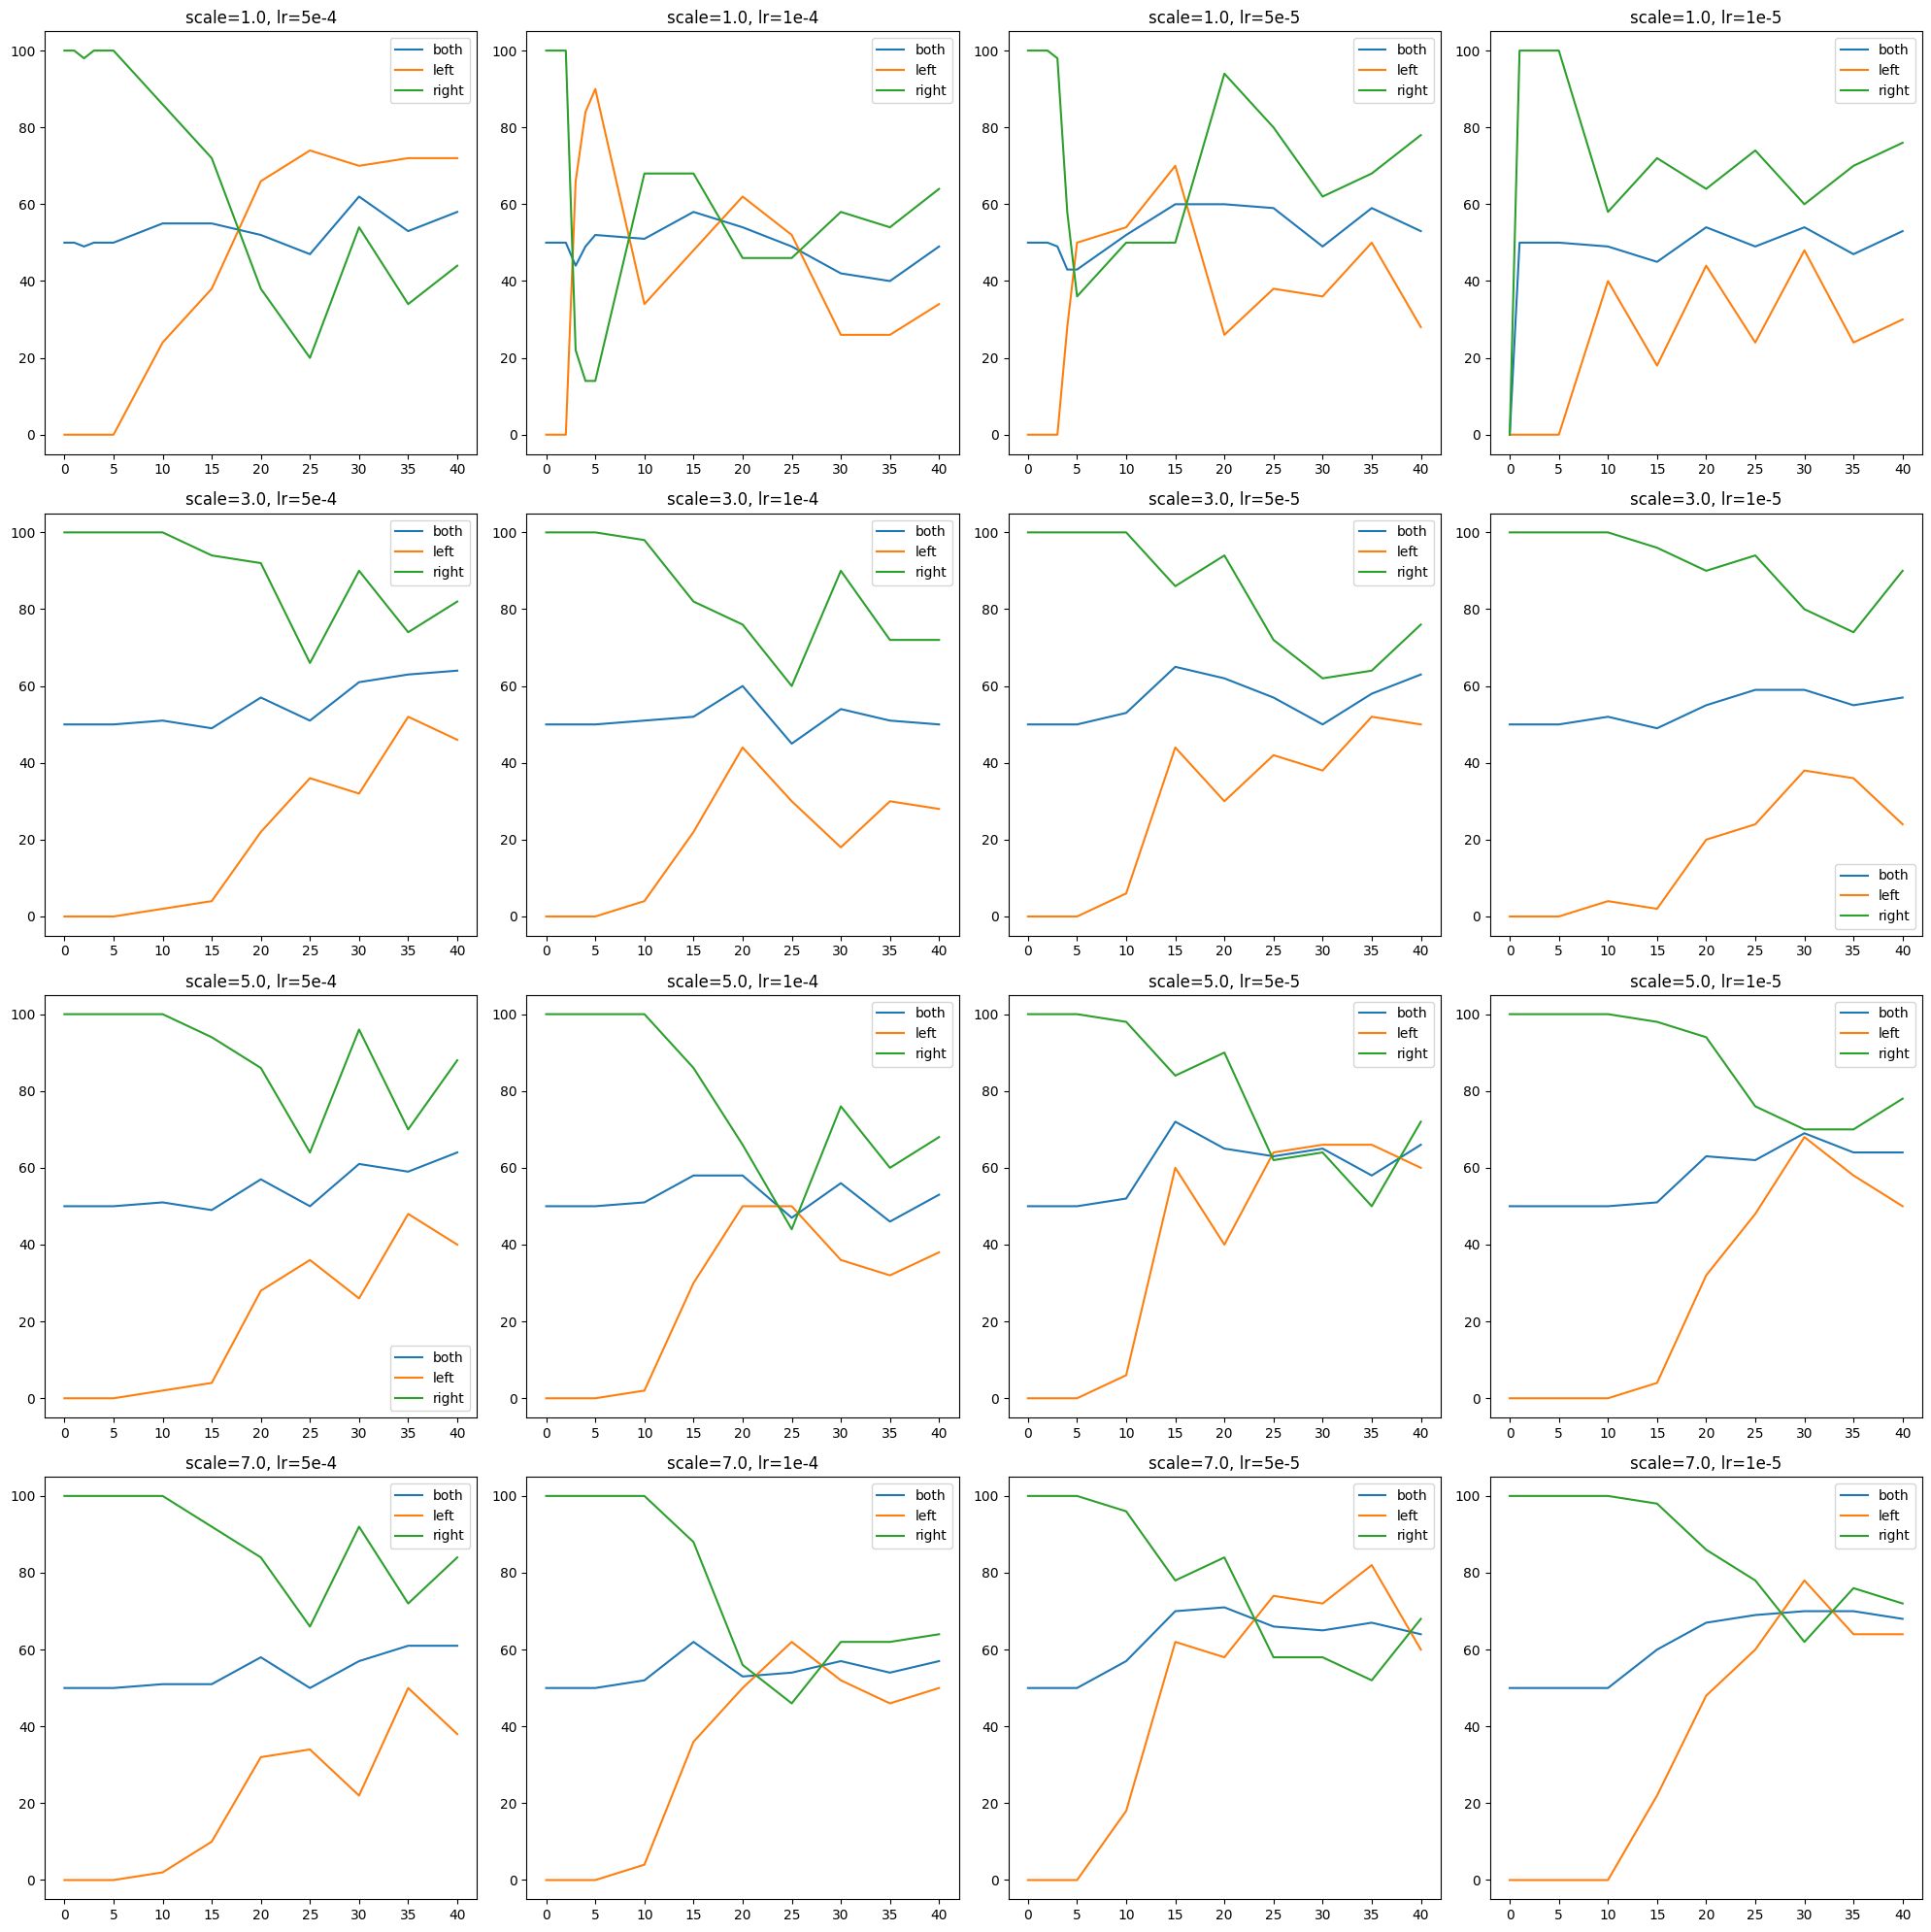

In [40]:
# plot both accuracy
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i, scale in enumerate(GUIDANCE_SCALES):
    for j, lr in enumerate(LEARNING_RATES):
        axs[i, j].plot(CHECKPOINTS, both_accuracy[scale][lr], label="both")
        axs[i, j].plot(CHECKPOINTS, [u* 2 for u in left_accuracy[scale][lr]], label="left")
        axs[i, j].plot(CHECKPOINTS, [u * 2 for u in right_accuracy[scale][lr]], label="right")
        axs[i, j].set_title(f"scale={scale}, lr={lr}")
        axs[i, j].legend() 
plt.tight_layout()
plt.show()


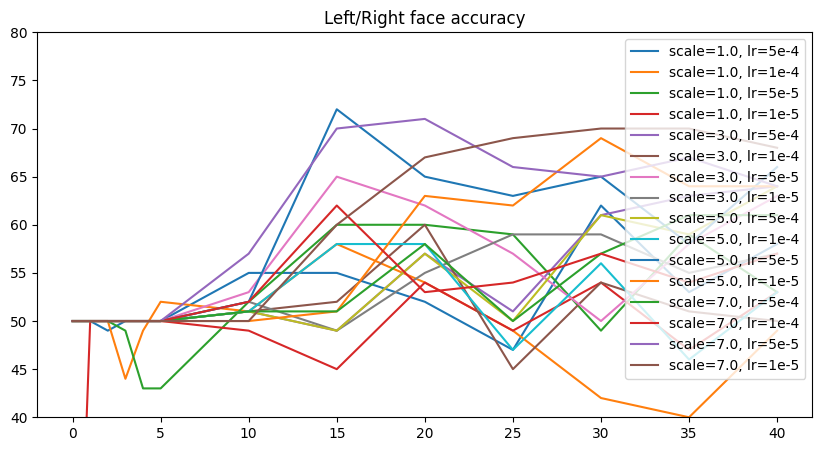

Text(0, 0.5, 'Accuracy')

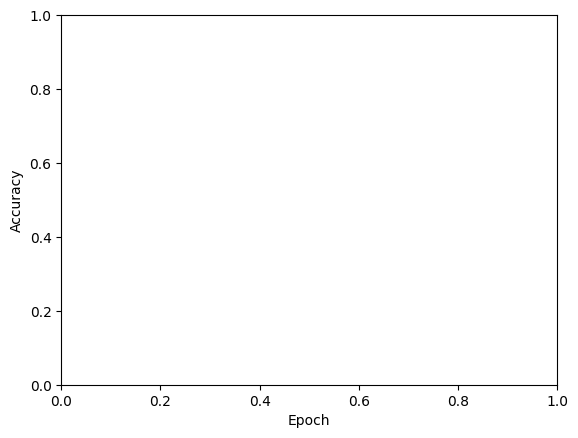

In [51]:
# plot both_accuracy in the single figure contain 16 lines 
fig, ax = plt.subplots(figsize=(10, 5))
for i, scale in enumerate(GUIDANCE_SCALES):
    for j, lr in enumerate(LEARNING_RATES):
        ax.plot(CHECKPOINTS, both_accuracy[scale][lr], label=f"scale={scale}, lr={lr}")
ax.set_title("Left/Right face accuracy")
ax.legend()
ax.set_ylim(40, 80)
plt.show()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

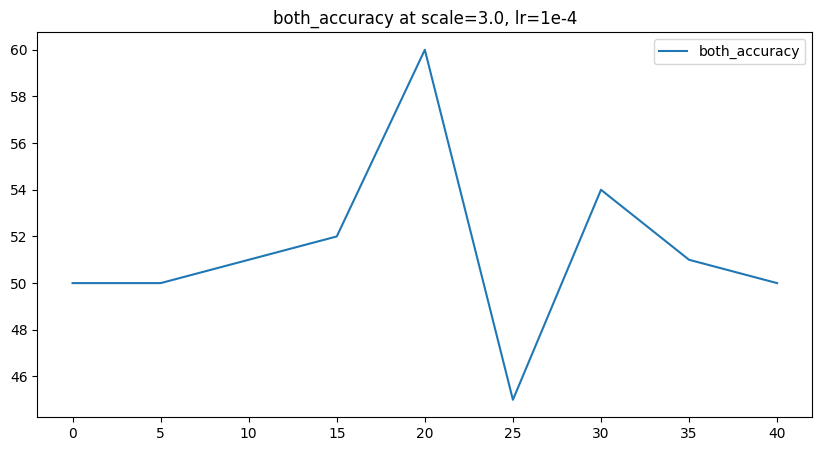

Text(0, 0.5, 'Accuracy')

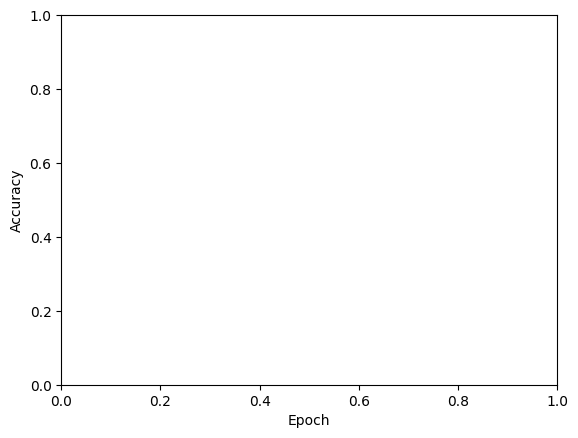

In [43]:
# plot only both_accuracy at scale=3.0, lr=1e-4
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(CHECKPOINTS, both_accuracy['3.0']['1e-4'], label="both_accuracy")
ax.set_title("both_accuracy at scale=3.0, lr=1e-4")
ax.legend()
plt.show()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [22]:
lr

'1e-5'